## Getting to know our data

[FINISH THIS!!!!]
In any project that uses data for downstream tasks such as inference, prediction, training models, or generating responses from LLMs (among others), it is crucial to understand the data we are working with. Remember: "Garbage in, garbage out."

For this purpose, this notebook contains some data analysis and exploration.

### Exploring our data

Let's begin by importing libraries and loading data.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

/home/lucas/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
BASE_DIR = Path.cwd()         
DATA_DIR = BASE_DIR.parent / "data"  

HOSPITALS_CSV_PATH   = DATA_DIR / "hospitals.csv"
PATIENTS_CSV_PATH    = DATA_DIR / "patients.csv"
PAYERS_CSV_PATH      = DATA_DIR / "payers.csv"
PHYSICIANS_CSV_PATH  = DATA_DIR / "physicians.csv"
REVIEWS_CSV_PATH     = DATA_DIR / "reviews.csv"
VISITS_CSV_PATH      = DATA_DIR / "visits.csv"

hospitals = pd.read_csv(HOSPITALS_CSV_PATH)
patients = pd.read_csv(PATIENTS_CSV_PATH )
payers = pd.read_csv(PAYERS_CSV_PATH )
physicians = pd.read_csv(PHYSICIANS_CSV_PATH )
reviews = pd.read_csv(REVIEWS_CSV_PATH )
visits = pd.read_csv(VISITS_CSV_PATH )

# dict for iteration
datasets = {
    'Hospitals': hospitals,
    'Patients': patients,
    'Payers': payers,
    'Physicians': physicians,
    'Reviews': reviews,
    'Visits': visits
}

Now, we can get some basic information about each dataset, including some sample of rows, and number of missing values. In many cases, it would also be a good idea to get a summary of statistics with `describe()`, but our data does not contain many numerical values that would yeild meaningful statistics, so we will skip that step (you are welcome to try it out on your own and see how that looks like, of course).

In [3]:
for name, df in datasets.items():
    print(f"\n=== {name} ===")
    print("First 5 rows:")
    display(df.head())
    print("\nInfo:")
    df.info()
    print("\nMissing values per column:")
    display(df.isnull().sum())
    
    # in case you want to see the descriptive statistics look like here (not very useful for us)
    # print("\nDescriptive statistics:")
    # display(df.describe(include='all'))


=== Hospitals ===
First 5 rows:


,hospital_id,hospital_name,hospital_state
0,0,Wallace-Hamilton,CO
1,1,"Burke, Griffin and Cooper",NC
2,2,Walton LLC,FL
3,3,Garcia Ltd,NC
4,4,"Jones, Brown and Murray",NC



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hospital_id     30 non-null     int64 
 1   hospital_name   30 non-null     object
 2   hospital_state  30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes

Missing values per column:


hospital_id       0
hospital_name     0
hospital_state    0
dtype: int64


=== Patients ===
First 5 rows:


,patient_name,patient_sex,patient_id,patient_dob,patient_blood_type
0,Tiffany Ramirez,Female,0,1994-10-06,O+
1,Ruben Burns,Male,1,1973-03-31,A-
2,Chad Byrd,Male,2,1932-05-10,O-
3,Antonio Frederick,Male,3,1944-10-04,AB+
4,Mrs. Brandy Flowers,Male,4,1989-01-26,AB+



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9649 entries, 0 to 9648
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_name        9649 non-null   object
 1   patient_sex         9649 non-null   object
 2   patient_id          9649 non-null   int64 
 3   patient_dob         9649 non-null   object
 4   patient_blood_type  9649 non-null   object
dtypes: int64(1), object(4)
memory usage: 377.0+ KB

Missing values per column:


patient_name          0
patient_sex           0
patient_id            0
patient_dob           0
patient_blood_type    0
dtype: int64


=== Payers ===
First 5 rows:


,payer_name,payer_id
0,Medicaid,0
1,UnitedHealthcare,1
2,Aetna,2
3,Cigna,3
4,Blue Cross,4



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   payer_name  5 non-null      object
 1   payer_id    5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes

Missing values per column:


payer_name    0
payer_id      0
dtype: int64


=== Physicians ===
First 5 rows:


,physician_name,physician_id,physician_dob,physician_grad_year,medical_school,salary
0,Joseph Johnson,0,1970-02-22,2000-02-22,Johns Hopkins University School of Medicine,309534.155076
1,Jason Williams,1,1982-12-22,2012-12-22,Mayo Clinic Alix School of Medicine,281114.503559
2,Jesse Gordon,2,1959-06-03,1989-06-03,David Geffen School of Medicine at UCLA,305845.584636
3,Heather Smith,3,1965-06-15,1995-06-15,NYU Grossman Medical School,295239.766689
4,Kayla Hunter DDS,4,1978-10-19,2008-10-19,David Geffen School of Medicine at UCLA,298751.355201



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   physician_name       500 non-null    object 
 1   physician_id         500 non-null    int64  
 2   physician_dob        500 non-null    object 
 3   physician_grad_year  500 non-null    object 
 4   medical_school       500 non-null    object 
 5   salary               500 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB

Missing values per column:


physician_name         0
physician_id           0
physician_dob          0
physician_grad_year    0
medical_school         0
salary                 0
dtype: int64


=== Reviews ===
First 5 rows:


,review_id,visit_id,review,physician_name,hospital_name,patient_name
0,0,6997,The medical staff at the hospital were incredi...,Laura Brown,Wallace-Hamilton,Christy Johnson
1,9,8138,The hospital's commitment to patient education...,Steven Watson,Wallace-Hamilton,Anna Frazier
2,11,680,The hospital's commitment to patient safety wa...,Chase Mcpherson Jr.,Wallace-Hamilton,Abigail Mitchell
3,892,9846,I had a positive experience overall at the hos...,Jason Martinez,Wallace-Hamilton,Kimberly Rivas
4,822,7397,The medical team at the hospital was exception...,Chelsey Davis,Wallace-Hamilton,Catherine Yang



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_id       1005 non-null   int64 
 1   visit_id        1005 non-null   int64 
 2   review          1005 non-null   object
 3   physician_name  1005 non-null   object
 4   hospital_name   1005 non-null   object
 5   patient_name    1005 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.2+ KB

Missing values per column:


review_id         0
visit_id          0
review            0
physician_name    0
hospital_name     0
patient_name      0
dtype: int64


=== Visits ===
First 5 rows:


,patient_id,date_of_admission,billing_amount,room_number,admission_type,discharge_date,test_results,visit_id,physician_id,payer_id,hospital_id,chief_complaint,treatment_description,primary_diagnosis,visit_status
0,0,2022-11-17,37490.983364,146,Elective,2022-12-01,Inconclusive,0,102,1,0,NaN,NaN,NaN,DISCHARGED
1,1,2023-06-01,47304.064845,404,Emergency,NaN,Normal,1,435,4,5,NaN,NaN,NaN,OPEN
2,2,2019-01-09,36874.896997,292,Emergency,2019-02-08,Normal,2,348,2,6,NaN,NaN,NaN,DISCHARGED
3,3,2020-05-02,23303.322092,480,Urgent,2020-05-03,Abnormal,3,270,4,15,NaN,NaN,NaN,DISCHARGED
4,4,2021-07-09,18086.344184,477,Urgent,2021-08-02,Normal,4,106,2,29,Persistent cough and shortness of breath,Prescribed a combination of inhaled bronchodil...,"J45.909 - Unspecified asthma, uncomplicated",DISCHARGED



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             9998 non-null   int64  
 1   date_of_admission      9998 non-null   object 
 2   billing_amount         9998 non-null   float64
 3   room_number            9998 non-null   int64  
 4   admission_type         9998 non-null   object 
 5   discharge_date         9498 non-null   object 
 6   test_results           9998 non-null   object 
 7   visit_id               9998 non-null   int64  
 8   physician_id           9998 non-null   int64  
 9   payer_id               9998 non-null   int64  
 10  hospital_id            9998 non-null   int64  
 11  chief_complaint        3000 non-null   object 
 12  treatment_description  3000 non-null   object 
 13  primary_diagnosis      3000 non-null   object 
 14  visit_status           9998 non-null   object 
dt

patient_id                  0
date_of_admission           0
billing_amount              0
room_number                 0
admission_type              0
discharge_date            500
test_results                0
visit_id                    0
physician_id                0
payer_id                    0
hospital_id                 0
chief_complaint          6998
treatment_description    6998
primary_diagnosis        6998
visit_status                0
dtype: int64

it seems like `visits.csv` is the only dataset with missing values in some columns, so let's take a look at it in more detail.

In [4]:
visits[visits.isnull().any(axis=1)].head(5)

,patient_id,date_of_admission,billing_amount,room_number,admission_type,discharge_date,test_results,visit_id,physician_id,payer_id,hospital_id,chief_complaint,treatment_description,primary_diagnosis,visit_status
0,0,2022-11-17,37490.983364,146,Elective,2022-12-01,Inconclusive,0,102,1,0,NaN,NaN,NaN,DISCHARGED
1,1,2023-06-01,47304.064845,404,Emergency,NaN,Normal,1,435,4,5,NaN,NaN,NaN,OPEN
2,2,2019-01-09,36874.896997,292,Emergency,2019-02-08,Normal,2,348,2,6,NaN,NaN,NaN,DISCHARGED
3,3,2020-05-02,23303.322092,480,Urgent,2020-05-03,Abnormal,3,270,4,15,NaN,NaN,NaN,DISCHARGED
5,5,2020-08-20,22522.363385,180,Urgent,2020-08-23,Abnormal,5,71,1,26,NaN,NaN,NaN,DISCHARGED


In [9]:
combine_mask = ['chief_complaint', 'treatment_description', 'primary_diagnosis']

combined_missing = visits[combine_mask].isnull()
combined_missing.astype(int).corr()

,chief_complaint,treatment_description,primary_diagnosis
chief_complaint,1.0,1.0,1.0
treatment_description,1.0,1.0,1.0
primary_diagnosis,1.0,1.0,1.0


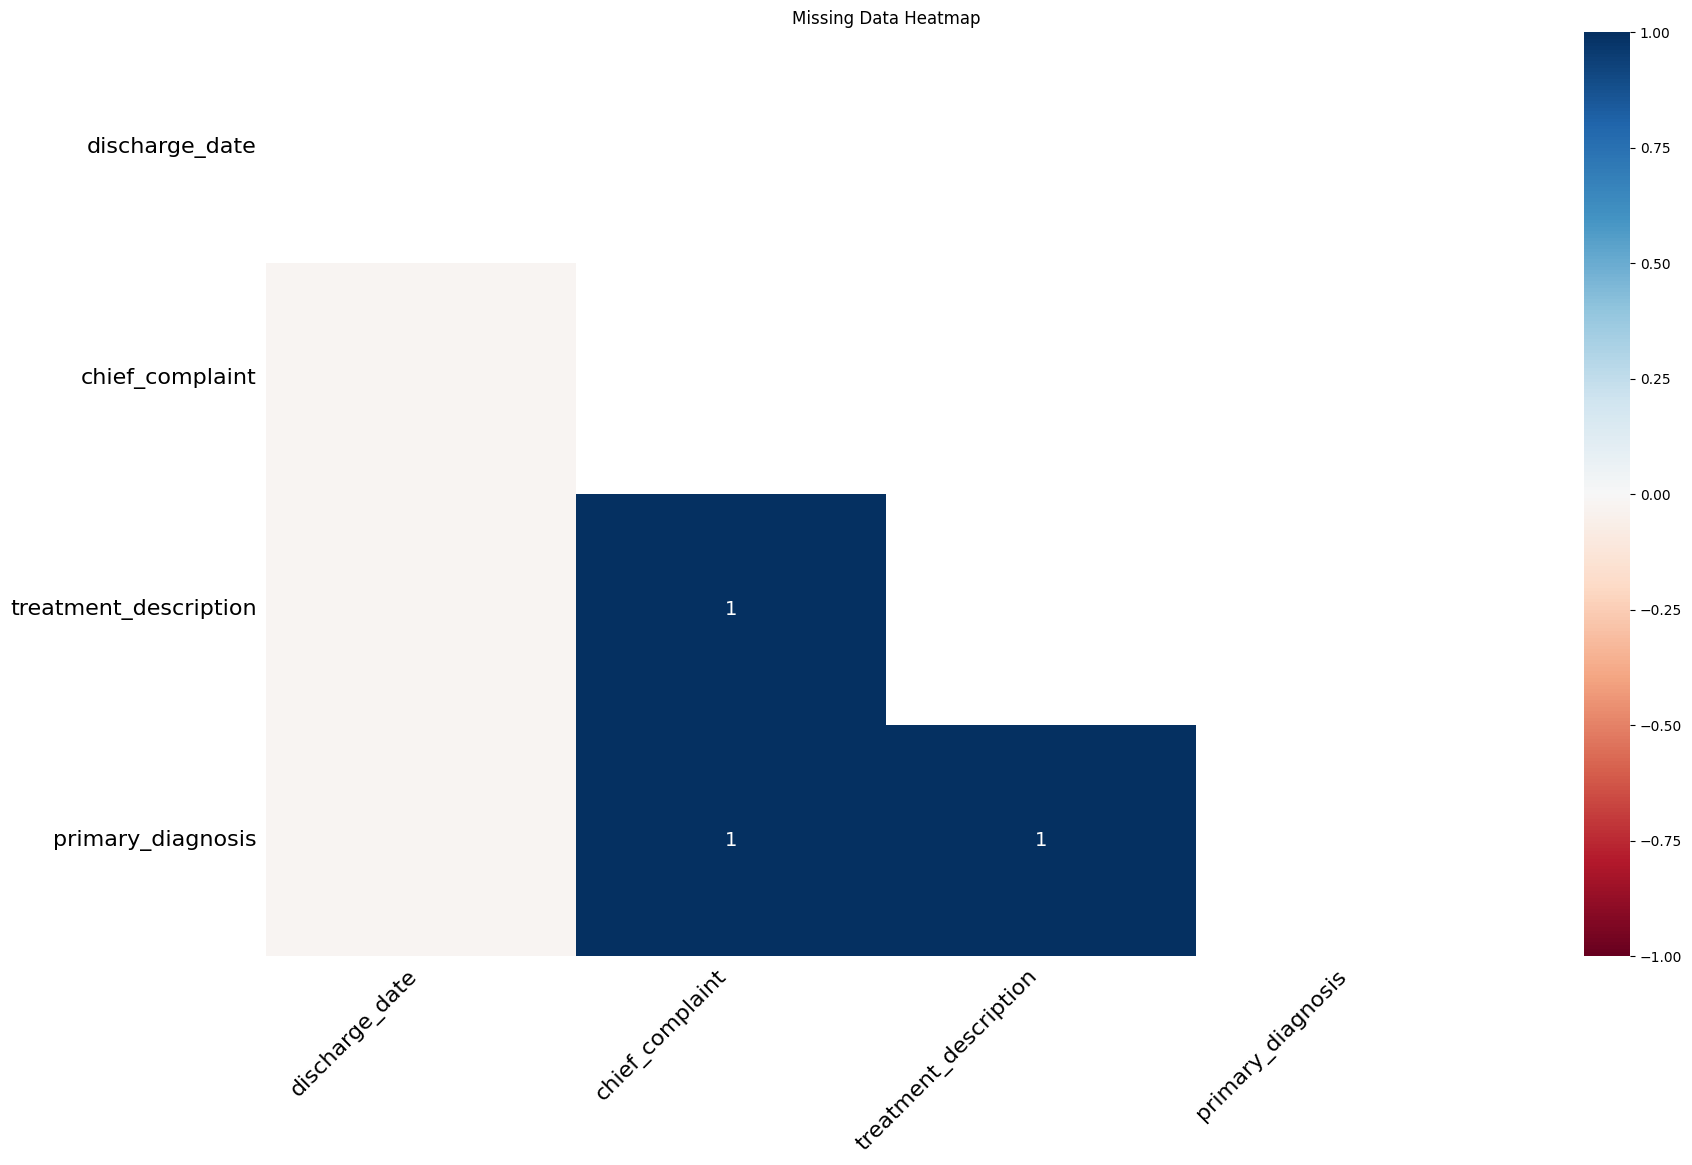

In [7]:
msno.heatmap(df)
plt.title("Missing Data Heatmap")
plt.show()

We see that `chief_complaint`, `treatment_description`, and `primary_diagnosis` have perfect missingness correlation, forming a "missingness block". In real world scenario, this could be an indicative that these columns are likely to be missing for a common reason (e.g. patients that are still waiting for any diagnosis to be assigned).

Of course there is much more things you could do to explore the data, such as visualizing the distribution of values in each column, checking for outliers, and so on. You can use this as an starting point, and get a feel for the data. We may come back to this later if we have time :)